## 🔢 05 - Transformaciones de matrices sobre una nube de puntos

Hasta ahora, apliqué matrices de transformación (rotación, escalado, reflexión, cizalla) sobre figuras geométricas simples como cuadrados.

En este cuaderno quiero llevar ese mismo enfoque visual, pero aplicándolo a un conjunto más grande de puntos, como si fueran datos reales. La idea es ver qué pasa cuando una matriz afecta **todo un espacio de datos** y no solo vectores individuales.

Este tipo de intuición es clave para avanzar luego hacia técnicas como **PCA**, **modelos lineales**, o incluso **compresión de datos**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos una nube de puntos aleatorios en 2D
np.random.seed(42) # para que siempre sea igual
X = np.random.randn(100, 2) # 100 puntos, 2 dimensiones

# Funcion para graficar original + transformado
def graficar_transformacion_matriz(A, titulo, color='orange'):
    X_trans = X @ A.T # multiplicacion por matriz
    plt.figure(figsize=(6,6))
    plt.scatter(X[:,0],X[:,1], alpha=0.5, label='Original')
    plt.scatter(X_trans[:,0],X_trans[:,1], alpha=0.5, label='Transformado', color=color)
    
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    
    plt.legend()
    plt.title(titulo)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

### 🌀 Rotación de 45° aplicada a una nube de puntos

Para este primer experimento, generé 100 puntos aleatorios distribuidos en un plano de dos dimensiones.

Luego, construí una matriz de rotación de 45 grados (π/4 radianes) y la apliqué a todos los puntos a la vez. El resultado es que la nube entera se rotó 45º en sentido antihorario, sin modificar su forma ni su tamaño.

Este tipo de transformación preserva distancias y ángulos: solo cambia la **orientación** de los datos. Es una operación fundamental en análisis de datos, ya que rotar el espacio puede ayudarnos a detectar patrones o alinearnos con nuevas direcciones más relevantes.


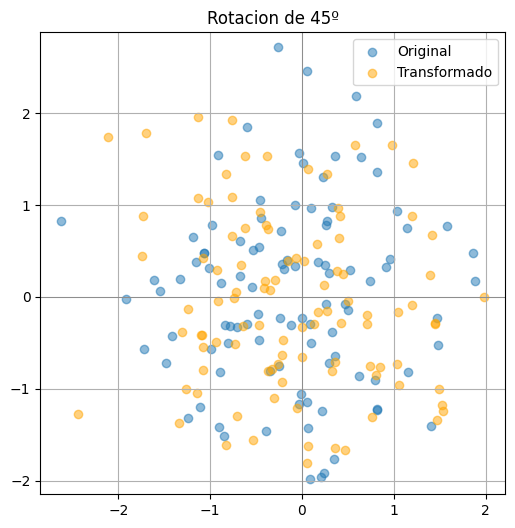

In [6]:
# Primer experimento: rotacion

# Matriz de rotacion de 45 grados
theta = np.pi / 4
A_rot = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

graficar_transformacion_matriz(A_rot, "Rotacion de 45º")

### 🟢 Cizalla en el eje X

En esta transformación he aplicado una **cizalla (shear)** a la nube original. Esto implica que cada punto se ha desplazado horizontalmente (en el eje X) en función de su valor en Y.

La matriz que utilicé fue:

\[
\begin{bmatrix}
1 & 1.2 \\
0 & 1 \\
\end{bmatrix}
\]

Este tipo de transformación **no rota** ni **escalona** la figura, pero sí la **deforma**, generando una especie de “inclinación” o “desplazamiento lateral” hacia la derecha.

Visualmente, se nota que la nube ha cambiado de forma pero conserva una estructura similar. Es útil para entender cómo se pueden modificar los datos sin alterar necesariamente su contenido, pero sí su distribución espacial.


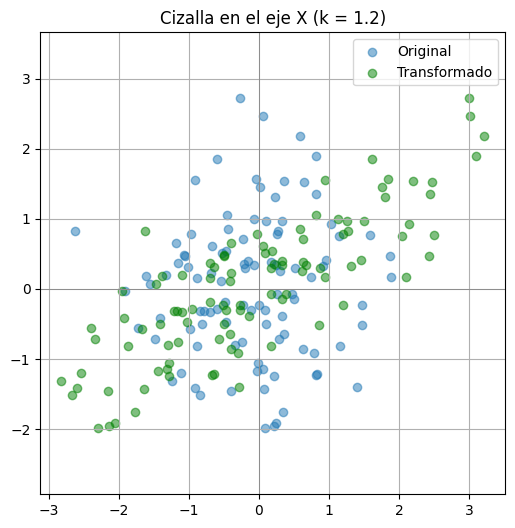

In [7]:
# Cizalla en el eje X (los puntos se inclinan hacia la derecha)
k = 1.2
A_shear_x = np.array([
    [1, k],
    [0, 1]
])

graficar_transformacion_matriz(A_shear_x, "Cizalla en el eje X (k = 1.2)", color='green')

### 🔺 Escalado no uniforme

En esta transformación he aplicado un **escalado diferente en cada eje**. La matriz utilizada fue:

\[
\begin{bmatrix}
2 & 0 \\
0 & 0.5 \\
\end{bmatrix}
\]

Esto significa:

- Se **duplicó** el valor de X (la nube se ensanchó).
- Se **redujo a la mitad** el valor de Y (la nube se aplastó verticalmente).

Este tipo de transformación es muy común cuando los datos tienen diferentes escalas en cada variable. Entender visualmente cómo afecta a los datos es útil para procesos como la **normalización**, el **análisis de varianza** o el **preprocesamiento** antes de entrenar modelos.


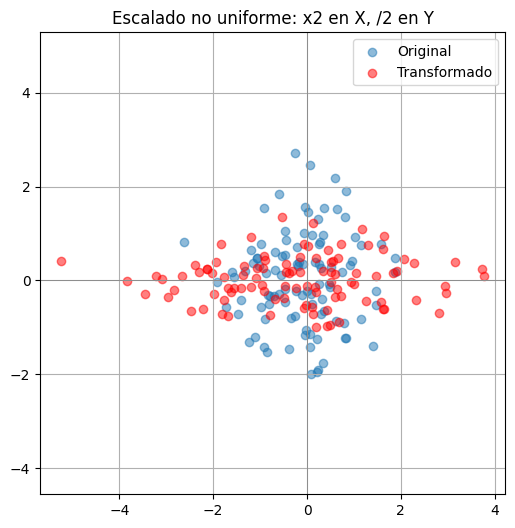

In [8]:
# Escalado no uniforme
A_scale = np.array([
    [2, 0],
    [0, 0.5]
])

graficar_transformacion_matriz(A_scale, "Escalado no uniforme: x2 en X, /2 en Y", color='red')